# **<span >Etape 1 - Le préprocessing</span>**




Librairies utilisées: unidecode, regex, nltk

unidecode : normaliser les caractères spéciaux  
nltk (Natural Language Toolkit) : analyser et manipuler le langage naturel   
regex (Expressions régulières) : repérer, extraire ou nettoyer des motifs textuels précis.

In [70]:
from unidecode import unidecode
import re
from nltk.stem import SnowballStemmer


1. Création du corpus et exploration

L'objectif est de normaliser ce corpus pas à pas. Il s'agit d'un article de blog, paru en Mars 2019, sur l'investissement de l'Entreprise Lyft, à Chicago, pour étendre 
son service Divvy à de plus larges zones de la ville. L'article parle du développement de Lyft et de ses relations avec la mairie de Chicago.

Le corpus est composé d'un seul article. Nous allons l'ouvrir pour pouvoir travailler dessus.

In [104]:
f= open("Article de presse.txt","r",encoding="utf8")
r=f.read()
corpus=[r]
s=len(corpus)

print(f"Le corpus est composé de {s} document{'' if s==1 else 's'}.")

Le corpus est composé de 1 document.


In [105]:
texte=corpus[0]
print(type(corpus))
print(type(texte))

<class 'list'>
<class 'str'>


Comme notre corpus ne contient qu'un seul document, nous allons le convertir en une variable string pour ne pas travailler avec une liste.

Mesurons la longueur de notre document: nous mesurons approximativement le nombre de mots qu'il contient.

In [116]:

# Notre variable "texte" est une variable string, sur laquelle nous allons pouvoir travailler:

# Nous créons une nouvelle variable liste: "liste_mots" pour savoir combien de mots contient l'article approximativement.
liste_mots=texte.split()

print(f"La longueur de l'article est de {len(liste_mots)} mots")

# L'article en format liste de string:
print(liste_mots)    


# L'article en format string:
texte


La longueur de l'article est de 839 mots
['Lyft', 'May', 'Spend', '$50M', 'to', 'Expand', 'Divvy', 'to', 'All', 'Wards,', 'Using', 'Dockless-Option', 'eBikes', 'By', 'John', 'Greenfield', '6:03', 'PM', 'UTC−5', 'on', 'March', '12,', '2019', '**************************************************************', 'url:', 'https://chi.streetsblog.org/2019/03/12/lyft-may-spend-50m-to-expand-divvy-to-all-wards-using-dockless-option-ebikes', '**************************************************************', 'Out', 'of', 'the', 'blue,', 'the', 'Divvy', 'bike', 'system', 'may', 'be', 'expanding', 'citywide.', 'The', 'city', 'of', 'Chicago', 'is', 'expected', 'to', 'announce', 'tomorrow', 'that', 'the', 'existing', 'Divvy', 'contract', 'will', 'be', 'amended', 'to', 'make', 'Lyft,', 'the', 'parent', 'company', 'of', 'Divvy', 'concessionaire', 'Motivate,', 'the', 'sponsor', 'of', 'the', 'network,', 'replacing', 'current', 'sponsor', 'Blue', 'Cross', 'Blue', 'Shield', 'of', 'Illinois.', 'As', 'part', 'o

'\n\nLyft May Spend $50M to Expand Divvy to All Wards, Using Dockless-Option eBikes\n\n\nBy John Greenfield\n\n6:03 PM UTC−5 on March 12, 2019\n\n\n**************************************************************\n\nurl: https://chi.streetsblog.org/2019/03/12/lyft-may-spend-50m-to-expand-divvy-to-all-wards-using-dockless-option-ebikes\n\n**************************************************************\n\nOut of the blue, the Divvy bike system may be expanding citywide. The city of Chicago is expected to announce tomorrow that the existing Divvy contract will be amended to make Lyft, the parent company of Divvy concessionaire Motivate, the sponsor of the network, replacing current sponsor Blue Cross Blue Shield of Illinois. As part of the deal, which will require City Council approval, Lyft would spend $50 million on stations and bikes to bring the bike-share service to neighborhoods that currently lack docks. The city says it would also receive at least $77 million in sponsorship money fro

En observant la variable string qui est générée, nous remarquons qu'il s'agit d'un texte en html. Il est donc necessaire de le retraiter pour obtenir 
un texte exploitable.

In [75]:
texte

'\n\nLyft May Spend $50M to Expand Divvy to All Wards, Using Dockless-Option eBikes\n\n\nBy John Greenfield\n\n6:03 PM UTC−5 on March 12, 2019\n\n\n**************************************************************\n\nurl: https://chi.streetsblog.org/2019/03/12/lyft-may-spend-50m-to-expand-divvy-to-all-wards-using-dockless-option-ebikes\n\n**************************************************************\n\nOut of the blue, the Divvy bike system may be expanding citywide. The city of Chicago is expected to announce tomorrow that the existing Divvy contract will be amended to make Lyft, the parent company of Divvy concessionaire Motivate, the sponsor of the network, replacing current sponsor Blue Cross Blue Shield of Illinois. As part of the deal, which will require City Council approval, Lyft would spend $50 million on stations and bikes to bring the bike-share service to neighborhoods that currently lack docks. The city says it would also receive at least $77 million in sponsorship money fro

Nous allons utiliser le package "Beautiful Soup" pour convertir le texte html en texte standard pouvant être exploité pour l'analyse de texte.

In [117]:
import bs4
import html

# Suppression des balises html:

soup = bs4.BeautifulSoup(texte,"lxml")
text=soup.get_text(separator="\n")

# Décoder les entités html (&nbsp,&amp, etc...):

text=html.unescape(text)

# Supprimer les url:
# La fonction re est utile:
# re.sub(motif(à trouver dans le string), remplacement, chaîne[, count, flags])

text=re.sub(r"http\S+","",text)

# Nettoyer les espaces multiples: 
text=re.sub(r"\n+","\n",text)


text=text.strip()
text

'Lyft May Spend $50M to Expand Divvy to All Wards, Using Dockless-Option eBikes\nBy John Greenfield\n6:03 PM UTC−5 on March 12, 2019\n**************************************************************\nurl: \n**************************************************************\nOut of the blue, the Divvy bike system may be expanding citywide. The city of Chicago is expected to announce tomorrow that the existing Divvy contract will be amended to make Lyft, the parent company of Divvy concessionaire Motivate, the sponsor of the network, replacing current sponsor Blue Cross Blue Shield of Illinois. As part of the deal, which will require City Council approval, Lyft would spend $50 million on stations and bikes to bring the bike-share service to neighborhoods that currently lack docks. The city says it would also receive at least $77 million in sponsorship money from Lyft over nine years.\nThe deal could be good news for making the system more equitable. There are currently a higher density of stat

In [79]:
# Supprimons les retour à la ligne intempestifs (\n):
# On les convertit en espace.
text_2=re.sub(r"\n"," ",text)
text_2=text_2.strip()
print(text_2)

Lyft May Spend $50M to Expand Divvy to All Wards, Using Dockless-Option eBikes By John Greenfield 6:03 PM UTC−5 on March 12, 2019 ************************************************************** url:  ************************************************************** Out of the blue, the Divvy bike system may be expanding citywide. The city of Chicago is expected to announce tomorrow that the existing Divvy contract will be amended to make Lyft, the parent company of Divvy concessionaire Motivate, the sponsor of the network, replacing current sponsor Blue Cross Blue Shield of Illinois. As part of the deal, which will require City Council approval, Lyft would spend $50 million on stations and bikes to bring the bike-share service to neighborhoods that currently lack docks. The city says it would also receive at least $77 million in sponsorship money from Lyft over nine years. The deal could be good news for making the system more equitable. There are currently a higher density of stations dow

In [ ]:
# Nous voulons remplacer tout ce qui se trouve entre le titre de l'article et le début de l'article
# afin de ne conserver que le titre et le corp de l'article.

# Trouvons l'index de fin du titre et l'index de début de l'article:
print(text_2.index("By John Greenfield 6:03")) 
print(text_2.index("Out of the blue,"))

79
262


In [119]:
# Pour nettoyer, nous créons une nouvelle variable qui contient le texte souhaité:

text_3= text_2[:78]+ ". " + text_2[262:]
text_3

'Lyft May Spend $50M to Expand Divvy to All Wards, Using Dockless-Option eBikes. Out of the blue, the Divvy bike system may be expanding citywide. The city of Chicago is expected to announce tomorrow that the existing Divvy contract will be amended to make Lyft, the parent company of Divvy concessionaire Motivate, the sponsor of the network, replacing current sponsor Blue Cross Blue Shield of Illinois. As part of the deal, which will require City Council approval, Lyft would spend $50 million on stations and bikes to bring the bike-share service to neighborhoods that currently lack docks. The city says it would also receive at least $77 million in sponsorship money from Lyft over nine years. The deal could be good news for making the system more equitable. There are currently a higher density of stations downtown and in more affluent neighborhoods, and many outlying communities don\'t have docks at all. The most obvious downside of the the deal is that, with Lyft replacing Blue Cross B

## 2/ Nettoyage du corpus:

### 2.1. Passage en minuscules

Nous allons tout d'abord passer l'ensemble du texte en minuscules.

In [129]:
# La variable text_4 sera notre texte nettoyé:
text_4=text_3.lower()
text_4

'lyft may spend $50m to expand divvy to all wards, using dockless-option ebikes. out of the blue, the divvy bike system may be expanding citywide. the city of chicago is expected to announce tomorrow that the existing divvy contract will be amended to make lyft, the parent company of divvy concessionaire motivate, the sponsor of the network, replacing current sponsor blue cross blue shield of illinois. as part of the deal, which will require city council approval, lyft would spend $50 million on stations and bikes to bring the bike-share service to neighborhoods that currently lack docks. the city says it would also receive at least $77 million in sponsorship money from lyft over nine years. the deal could be good news for making the system more equitable. there are currently a higher density of stations downtown and in more affluent neighborhoods, and many outlying communities don\'t have docks at all. the most obvious downside of the the deal is that, with lyft replacing blue cross b

### <span >2.2. Suppression des accents:

Ceci est un test

In [130]:
text_4=unidecode(text_4)

text_4

'lyft may spend $50m to expand divvy to all wards, using dockless-option ebikes. out of the blue, the divvy bike system may be expanding citywide. the city of chicago is expected to announce tomorrow that the existing divvy contract will be amended to make lyft, the parent company of divvy concessionaire motivate, the sponsor of the network, replacing current sponsor blue cross blue shield of illinois. as part of the deal, which will require city council approval, lyft would spend $50 million on stations and bikes to bring the bike-share service to neighborhoods that currently lack docks. the city says it would also receive at least $77 million in sponsorship money from lyft over nine years. the deal could be good news for making the system more equitable. there are currently a higher density of stations downtown and in more affluent neighborhoods, and many outlying communities don\'t have docks at all. the most obvious downside of the the deal is that, with lyft replacing blue cross b

### 2.3. Transformation d'expressions:

In [131]:
# Conversion des expressions numériques:
text_4=re.sub(r'[0-9]{2}','money ',text_4)
text_4

'lyft may spend $money m to expand divvy to all wards, using dockless-option ebikes. out of the blue, the divvy bike system may be expanding citywide. the city of chicago is expected to announce tomorrow that the existing divvy contract will be amended to make lyft, the parent company of divvy concessionaire motivate, the sponsor of the network, replacing current sponsor blue cross blue shield of illinois. as part of the deal, which will require city council approval, lyft would spend $money  million on stations and bikes to bring the bike-share service to neighborhoods that currently lack docks. the city says it would also receive at least $money  million in sponsorship money from lyft over nine years. the deal could be good news for making the system more equitable. there are currently a higher density of stations downtown and in more affluent neighborhoods, and many outlying communities don\'t have docks at all. the most obvious downside of the the deal is that, with lyft replacing 

In [132]:
text_4=re.sub(r'[0-9]{4}','annee',text_4)
text_4

'lyft may spend $money m to expand divvy to all wards, using dockless-option ebikes. out of the blue, the divvy bike system may be expanding citywide. the city of chicago is expected to announce tomorrow that the existing divvy contract will be amended to make lyft, the parent company of divvy concessionaire motivate, the sponsor of the network, replacing current sponsor blue cross blue shield of illinois. as part of the deal, which will require city council approval, lyft would spend $money  million on stations and bikes to bring the bike-share service to neighborhoods that currently lack docks. the city says it would also receive at least $money  million in sponsorship money from lyft over nine years. the deal could be good news for making the system more equitable. there are currently a higher density of stations downtown and in more affluent neighborhoods, and many outlying communities don\'t have docks at all. the most obvious downside of the the deal is that, with lyft replacing 

### 2.4. Suppression des numériques et des caractères spéciaux:

In [133]:
text_4=re.sub(r'[^a-z]+',' ',text_4)
text_4

'lyft may spend money m to expand divvy to all wards using dockless option ebikes out of the blue the divvy bike system may be expanding citywide the city of chicago is expected to announce tomorrow that the existing divvy contract will be amended to make lyft the parent company of divvy concessionaire motivate the sponsor of the network replacing current sponsor blue cross blue shield of illinois as part of the deal which will require city council approval lyft would spend money million on stations and bikes to bring the bike share service to neighborhoods that currently lack docks the city says it would also receive at least money million in sponsorship money from lyft over nine years the deal could be good news for making the system more equitable there are currently a higher density of stations downtown and in more affluent neighborhoods and many outlying communities don t have docks at all the most obvious downside of the the deal is that with lyft replacing blue cross blue shield

### 2.5. Suppression de tous les stopwords:

Nous allons tout d'abord récupérer une liste des stopwords en anglais/américain. Puis les retirer du corpus.  
Pour cela nous nous basons sur la liste des stopwords définis par spacy.  
https://github.com/explosion/spaCy/blob/master/spacy/lang/en/stop_words.py

In [121]:
# Liste des stopwords en anglais/américain.
# Nous avons une liste, qui est une variable string: 

stop_words=("""a about above across after afterwards again against all almost alone along
already also although always am among amongst amount an and another any anyhow
anyone anything anyway anywhere are around as at

back be became because become becomes becoming been before beforehand behind
being below beside besides between beyond both bottom but by

call can cannot ca could

did do does doing done down due during

each eight either eleven else elsewhere empty enough even ever every
everyone everything everywhere except

few fifteen fifty first five for former formerly forty four from front full
further

get give go

had has have he hence her here hereafter hereby herein hereupon hers herself
him himself his how however hundred

i if in indeed into is it its itself

keep

last latter latterly least less

just

made make many may me meanwhile might mine more moreover most mostly move much
must my myself

name namely neither never nevertheless next nine no nobody none noone nor not
nothing now nowhere

of off often on once one only onto or other others otherwise our ours ourselves
out over own

part per perhaps please put

quite

rather re really regarding

same say see seem seemed seeming seems serious several she should show side
since six sixty so some somehow someone something sometime sometimes somewhere
still such

take ten than that the their them themselves then thence there thereafter
thereby therefore therein thereupon these they third this those though three
through throughout thru thus to together too top toward towards twelve twenty
two

under until up unless upon us used using

various very very via was we well were what whatever when whence whenever where
whereafter whereas whereby wherein whereupon wherever whether which while
whither who whoever whole whom whose why will with within without would

yet you your yours yourself yourselves""")

print(stop_words)

a about above across after afterwards again against all almost alone along
already also although always am among amongst amount an and another any anyhow
anyone anything anyway anywhere are around as at

back be became because become becomes becoming been before beforehand behind
being below beside besides between beyond both bottom but by

call can cannot ca could

did do does doing done down due during

each eight either eleven else elsewhere empty enough even ever every
everyone everything everywhere except

few fifteen fifty first five for former formerly forty four from front full
further

get give go

had has have he hence her here hereafter hereby herein hereupon hers herself
him himself his how however hundred

i if in indeed into is it its itself

keep

last latter latterly least less

just

made make many may me meanwhile might mine more moreover most mostly move much
must my myself

name namely neither never nevertheless next nine no nobody none noone nor not
nothing now now

In [134]:
# Il faut retraiter cette chaine de caractères pour en faire une liste:
# 1. Suppression des saut de ligne:
sstop_words=stop_words.replace("\n"," ")

# 2. Création d'une liste à partir des éléments de cette variable:
stlist= sstop_words.split()

print(stlist)

['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'ca', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'have', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon

In [135]:
# Nous devons egalement supprimer l'ensemble des lettres de l'alphabet qui ne sont pas dans cette liste mais qui ne sont pas pertinentes pour un wordcloud:
alphaB=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 
             'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

# Rajoutons alphaB à la liste stwords des stopwords en anglais:
stlist=stlist+alphaB
stlist

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'call',
 'can',
 'cannot',
 'ca',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'front',
 'full',
 'further',
 'get',
 'give',
 'g

In [136]:
text_5=""
for word in text_4.split():
    if word not in stlist:
        text_5=text_5 + " "+ word

text_5

' lyft spend money expand divvy wards dockless option ebikes blue divvy bike system expanding citywide city chicago expected announce tomorrow existing divvy contract amended lyft parent company divvy concessionaire motivate sponsor network replacing current sponsor blue cross blue shield illinois deal require city council approval lyft spend money million stations bikes bring bike share service neighborhoods currently lack docks city says receive money million sponsorship money lyft years deal good news making system equitable currently higher density stations downtown affluent neighborhoods outlying communities don docks obvious downside deal lyft replacing blue cross blue shield illinois sponsor bikes bear logo ride share service studies shown ride share increasing traffic deaths congestion cities decreasing transit ridership somewhat problematic thousands divvy bikes double ads lyft addition amendment freeze bike share providers operating chicago streets later administration priori

### 2.6. Stemmatisation:  

Nous allons terminer par stemmatiser le document.

In [137]:
stemmer = SnowballStemmer("english")
text_6=""

for word in text_5.split():
    text_6=text_6+" "+ stemmer.stem(word)

text_6

' lyft spend money expand divvi ward dockless option ebik blue divvi bike system expand citywid citi chicago expect announc tomorrow exist divvi contract amend lyft parent compani divvi concessionair motiv sponsor network replac current sponsor blue cross blue shield illinoi deal requir citi council approv lyft spend money million station bike bring bike share servic neighborhood current lack dock citi say receiv money million sponsorship money lyft year deal good news make system equit current higher densiti station downtown affluent neighborhood out communiti don dock obvious downsid deal lyft replac blue cross blue shield illinoi sponsor bike bear logo ride share servic studi shown ride share increas traffic death congest citi decreas transit ridership somewhat problemat thousand divvi bike doubl ad lyft addit amend freez bike share provid oper chicago street later administr prioriti creat varieti high qualiti reliabl transport option chicagoan visitor want mayor rahm emanuel said s

### Fin du nettoyage du document.

In [138]:
l_text6=text_6.split()
print(l_text6)
print(len(l_text6))

['lyft', 'spend', 'money', 'expand', 'divvi', 'ward', 'dockless', 'option', 'ebik', 'blue', 'divvi', 'bike', 'system', 'expand', 'citywid', 'citi', 'chicago', 'expect', 'announc', 'tomorrow', 'exist', 'divvi', 'contract', 'amend', 'lyft', 'parent', 'compani', 'divvi', 'concessionair', 'motiv', 'sponsor', 'network', 'replac', 'current', 'sponsor', 'blue', 'cross', 'blue', 'shield', 'illinoi', 'deal', 'requir', 'citi', 'council', 'approv', 'lyft', 'spend', 'money', 'million', 'station', 'bike', 'bring', 'bike', 'share', 'servic', 'neighborhood', 'current', 'lack', 'dock', 'citi', 'say', 'receiv', 'money', 'million', 'sponsorship', 'money', 'lyft', 'year', 'deal', 'good', 'news', 'make', 'system', 'equit', 'current', 'higher', 'densiti', 'station', 'downtown', 'affluent', 'neighborhood', 'out', 'communiti', 'don', 'dock', 'obvious', 'downsid', 'deal', 'lyft', 'replac', 'blue', 'cross', 'blue', 'shield', 'illinoi', 'sponsor', 'bike', 'bear', 'logo', 'ride', 'share', 'servic', 'studi', 'sho

# Etape 2 - La vectorisation


Cette étape permet de structurer les mots afin de pouvoir construire une représentation graphique. C'est de cette manière que nos machines vont pouvoir "comprendre" nos textes.

### Import des librairies utiles au module

In [139]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from collections import defaultdict

### 1. Le vocabulaire

Trouvons notre vocabulaire : il contient tous les mots uniques présents dans l'article nettoyé.

Chaque document est alors représenté comme un vecteur de taille V (où V est la taille du vocabulaire).

Le préprocessing des documents réduit significativement la taille du vocabulaire employé.

In [146]:
# Créons le vocabulaire: 
# Voyons la différence de longueur aproximative:

vocab =set(l_text6)
print(f"L'article original est de longueur: {len(liste_mots)}")
print(f"le corpus nettoyé est de longueur : {len(l_text6)}")
print(f"Le vocabulaire est de longueur: {len(vocab)}")
print(f"Ci-dessous le vocabulaire (mots uniques), par ordre alphabétique: \n{sorted(vocab)}\n")

L'article original est de longueur: 839
le corpus nettoyé est de longueur : 458
Le vocabulaire est de longueur: 215
Ci-dessous le vocabulaire (mots uniques), par ordre alphabétique: 
['abil', 'absorb', 'access', 'account', 'ad', 'adapt', 'addit', 'administr', 'advertis', 'affluent', 'agreement', 'aldermen', 'amend', 'america', 'announc', 'annual', 'approv', 'assert', 'assess', 'assist', 'bear', 'best', 'bike', 'blue', 'bring', 'capabl', 'chang', 'chicago', 'chicagoan', 'citi', 'citywid', 'communiti', 'compani', 'concessionair', 'congest', 'continu', 'contract', 'control', 'cost', 'council', 'creat', 'cross', 'current', 'cycl', 'daley', 'day', 'deal', 'death', 'decreas', 'densiti', 'detail', 'devil', 'disabl', 'divvi', 'dock', 'dockless', 'don', 'doubl', 'downsid', 'downtown', 'dramat', 'ebik', 'electr', 'elimin', 'emanuel', 'ensur', 'equip', 'equit', 'equiti', 'ex', 'exceed', 'exclus', 'exist', 'expand', 'expect', 'extend', 'extens', 'face', 'fare', 'financi', 'freez', 'good', 'great',

### 2. Les colonnes des vecteurs sont organisées par ordre alphabétique:

In [147]:
print(vectorizer.get_feature_names_out())

['abil' 'absorb' 'access' 'account' 'ad' 'adapt' 'addit' 'administr'
 'advertis' 'affluent' 'agreement' 'aldermen' 'amend' 'america' 'anne'
 'announc' 'annual' 'approv' 'assert' 'assess' 'assist' 'bear' 'best'
 'bike' 'blue' 'bring' 'capabl' 'chang' 'chicago' 'chicagoan' 'citi'
 'citywid' 'communiti' 'compani' 'concessionair' 'congest' 'continu'
 'contract' 'control' 'cost' 'council' 'creat' 'cross' 'current' 'cycl'
 'daley' 'day' 'deal' 'death' 'decreas' 'densiti' 'detail' 'devil'
 'disabl' 'divvi' 'dock' 'dockless' 'don' 'doubl' 'downsid' 'downtown'
 'dramat' 'ebik' 'electr' 'elimin' 'emanuel' 'ensur' 'equip' 'equit'
 'equiti' 'ex' 'exceed' 'exclus' 'exist' 'expand' 'expect' 'extend'
 'extens' 'face' 'fare' 'financi' 'freez' 'good' 'great' 'growth'
 'guarante' 'hardwar' 'hate' 'heavi' 'help' 'high' 'higher' 'hope'
 'hybrid' 'illinoi' 'incom' 'increas' 'job' 'lack' 'later' 'launch'
 'licens' 'life' 'lock' 'logo' 'loss' 'low' 'lyft' 'maintain' 'make'
 'matter' 'mayor' 'meet' 'meter' 'm

### 3. La fréquence d'apparition des mots:

In [148]:
# Initialisation du dictionnaire
freq = defaultdict(int) # crée un dictionnaire avec une valeur par défaut automatique pour les nouvelles clés. ( int() renvoie 0)

# Compte l'ocurrence de chaque mot du corpus
for mot in l_text6:
    freq[mot] += 1
    
print(freq)

defaultdict(<class 'int'>, {'lyft': 15, 'spend': 2, 'money': 21, 'expand': 5, 'divvi': 12, 'ward': 3, 'dockless': 2, 'option': 2, 'ebik': 1, 'blue': 5, 'bike': 15, 'system': 6, 'citywid': 1, 'citi': 25, 'chicago': 9, 'expect': 1, 'announc': 2, 'tomorrow': 1, 'exist': 2, 'contract': 7, 'amend': 6, 'parent': 1, 'compani': 2, 'concessionair': 1, 'motiv': 1, 'sponsor': 3, 'network': 1, 'replac': 2, 'current': 6, 'cross': 2, 'shield': 2, 'illinoi': 2, 'deal': 4, 'requir': 2, 'council': 4, 'approv': 4, 'million': 6, 'station': 5, 'bring': 2, 'share': 9, 'servic': 3, 'neighborhood': 2, 'lack': 1, 'dock': 2, 'say': 5, 'receiv': 2, 'sponsorship': 1, 'year': 6, 'good': 1, 'news': 2, 'make': 1, 'equit': 1, 'higher': 1, 'densiti': 1, 'downtown': 1, 'affluent': 1, 'out': 1, 'communiti': 1, 'don': 1, 'obvious': 1, 'downsid': 1, 'bear': 1, 'logo': 1, 'ride': 2, 'studi': 1, 'shown': 1, 'increas': 4, 'traffic': 1, 'death': 1, 'congest': 1, 'decreas': 1, 'transit': 1, 'ridership': 2, 'somewhat': 1, 'pro

### 4. Création du nuage de mots:

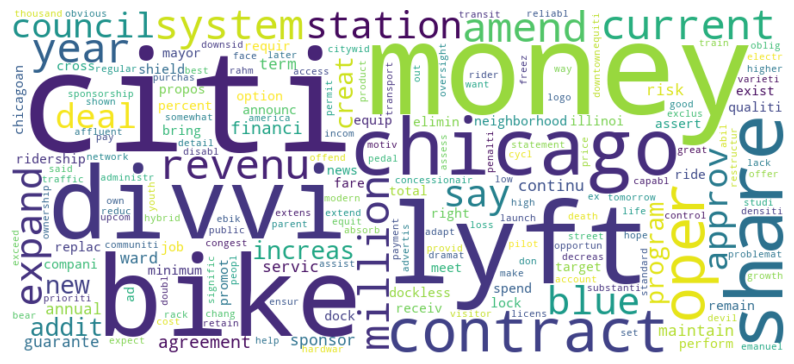

In [149]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Création du word cloud
wordcloud = WordCloud(
    width=900,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(freq)

# Affichage
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

La liste des librairies utilisées dans ce projet:

In [100]:
import sys
import pkg_resources

libs = sorted({pkg.key for pkg in pkg_resources.working_set})

for lib in libs:
    try:
        version = pkg_resources.get_distribution(lib).version
        print(f"{lib}=={version}")
    except:
        pass

altair==5.3.0
anyio==4.11.0
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
arrow==1.4.0
asttokens==3.0.1
async-lru==2.0.5
attrs==25.4.0
autocommand==2.2.2
babel==2.17.0
backports.tarfile==1.2.0
beautifulsoup4==4.14.2
bleach==6.3.0
blinker==1.9.0
bs4==0.0.2
cachetools==6.2.2
certifi==2025.11.12
cffi==2.0.0
charset-normalizer==3.4.4
click==8.3.0
colorama==0.4.6
comm==0.2.3
contourpy==1.3.3
cycler==0.12.1
debugpy==1.8.17
decorator==5.2.1
defusedxml==0.7.1
executing==2.2.1
fastjsonschema==2.21.2
flask==3.1.2
fonttools==4.60.1
fqdn==1.5.1
geographiclib==2.1
geopy==2.4.1
gitdb==4.0.12
gitpython==3.1.45
greenlet==3.2.4
h11==0.16.0
httpcore==1.0.9
httpx==0.28.1
idna==3.11
importlib-metadata==8.0.0
inflect==7.3.1
ipykernel==7.1.0
ipython==9.7.0
ipython-pygments-lexers==1.1.1
isoduration==20.11.0
itsdangerous==2.2.0
jaraco.collections==5.1.0
jaraco.context==5.3.0
jaraco.functools==4.0.1
jaraco.text==3.12.1
jedi==0.19.2
jinja2==3.1.6
joblib==1.5.2
json5==0.12.1
jsonpointer==3.0.0
jsonschema==4.